## Prerequisitos
Usarememos numpy y linalg de scipy (que incluye mucho de numpy.linalg)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
import scipy.io as io
import scipy.sparse as sp
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
import pprint
import urllib.request

 **scipy.linalg**  contiene todas las funciones de **numpy.linalg** y algunas otras. **scipy.linalg** usa BLAS/LAPACK por defecto. Se aconseja 
usar **scipy.linalg** a menos que se tenga una razón de peso para no hacerlo. 


## Métodos directos
Presentamos algunos comandos relacionados con la solución de sistemas lineales por métodos directos.

### Normas 

In [ ]:
x=np.array([1,2,3,-4])
la.norm(x,1)

10.0

In [ ]:
la.norm(x,2) #Euclidiana

5.477225575051661

In [ ]:
la.norm(x,np.Inf)

4.0

In [ ]:
A=np.array([[0, 0, 1],
       [-1,  2,  2],
       [ 1, 2,  1]])
print(A)
print('La norma  2 de la matrix extendida a vector  es = ',la.norm(A)) #máximo valor singular
print('La norma de Frobenious es = ',la.norm(A,'fro')) # Frobenius
print('La norma subordinada 1 es = ',la.norm(A,1))
print('La norma subordinada 2 es = ', la.norm(A,2))
print('La norma subordinada Inf es = ', la.norm(A,np.Inf))

[[ 0  0  1]
 [-1  2  2]
 [ 1  2  1]]
La norma  2 de la matrix extendida a vector  es =  4.0
La norma de Frobenious es =  4.0
La norma subordinada 1 es =  4.0
La norma subordinada 2 es =  3.622222345931449
La norma subordinada Inf es =  5.0


### Factorización $A=PLU$ y Cholesky

Calculemos la factorización $A=PLU$ de una matriz $4\times 4$.

In [ ]:
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
p, l, u = la.lu(A)
print('Matriz de permutación:\n',p,'\n')
print('Matriz triangular inferior\n',l,'\n')
print('Matriz triangular superior\n',u,'\n')

Matriz de permutación:
 [[ 0.0000  1.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000  1.0000]
 [ 1.0000  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  1.0000  0.0000]] 

Matriz triangular inferior
 [[ 1.0000  0.0000  0.0000  0.0000]
 [ 0.2857  1.0000  0.0000  0.0000]
 [ 0.7143  0.1200  1.0000  0.0000]
 [ 0.7143 -0.4400 -0.4615  1.0000]] 

Matriz triangular superior
 [[ 7.0000  5.0000  6.0000  6.0000]
 [ 0.0000  3.5714  6.2857  5.2857]
 [ 0.0000  0.0000 -1.0400  3.0800]
 [ 0.0000  0.0000  0.0000  7.4615]] 



Ahora calculemos la factorización para la matriz de Hilbert.

In [ ]:
H=la.hilbert(9)
print('H=\n',H)

H=
 [[ 1.0000  0.5000  0.3333  0.2500  0.2000  0.1667  0.1429  0.1250  0.1111]
 [ 0.5000  0.3333  0.2500  0.2000  0.1667  0.1429  0.1250  0.1111  0.1000]
 [ 0.3333  0.2500  0.2000  0.1667  0.1429  0.1250  0.1111  0.1000  0.0909]
 [ 0.2500  0.2000  0.1667  0.1429  0.1250  0.1111  0.1000  0.0909  0.0833]
 [ 0.2000  0.1667  0.1429  0.1250  0.1111  0.1000  0.0909  0.0833  0.0769]
 [ 0.1667  0.1429  0.1250  0.1111  0.1000  0.0909  0.0833  0.0769  0.0714]
 [ 0.1429  0.1250  0.1111  0.1000  0.0909  0.0833  0.0769  0.0714  0.0667]
 [ 0.1250  0.1111  0.1000  0.0909  0.0833  0.0769  0.0714  0.0667  0.0625]
 [ 0.1111  0.1000  0.0909  0.0833  0.0769  0.0714  0.0667  0.0625  0.0588]]


In [ ]:
p, l, u = la.lu(H)
res=H-p@l@u
print('pA-LU=\n',res)
print('La norma Inf del residuo es ',la.norm(res,np.Inf))
print('La norma 2 del residuo es ', la.norm(res,2))

pA-LU=
 [[ 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000  0.0000  0.0000 -0.0000  0.0000  0.0000 -0.0000]
 [ 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000 -0.0000  0.0000  0.0000 -0.0000  0.0000 -0.0000  0.0000]
 [ 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000 -0.0000  0.0000]
 [ 0.0000  0.0000 -0.0000  0.0000 -0.0000  0.0000  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000 -0.0000]]
La norma Inf del residuo es  5.551115123125783e-17
La norma 2 del residuo es  4.3091695835249104e-17


Calculemos la permutación de la factorización $A=PLU$ para una matriz diagonal dominante.

In [ ]:
A = np.array([[5, -1, 2, -1], [-1, 5, 0, 1], [0, -1, 4, 2], [1, 1, 1, 5]])
p, l, u = la.lu(A)
print(p)

[[ 1.0000  0.0000  0.0000  0.0000]
 [ 0.0000  1.0000  0.0000  0.0000]
 [ 0.0000  0.0000  1.0000  0.0000]
 [ 0.0000  0.0000  0.0000  1.0000]]


Calculemos ahora la factorización de Cholesky de una matri de la forma $A^TA$ con $A$ aleatoria. 

In [ ]:
A=np.random.rand(4,4)
B=A.transpose()@A
r=la.cholesky(B)
print(r)

[[ 0.8322  0.7293  0.6074  0.6297]
 [ 0.0000  1.1335  1.0471  0.7100]
 [ 0.0000  0.0000  0.5938  0.7046]
 [ 0.0000  0.0000  0.0000  0.5140]]


### Sistemas lineales

Resolver un sistema lineal general.

In [ ]:
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])
x = la.solve(A, b)
res=b-A@x
print('x=',x.transpose())
print('res=',la.norm(res))


x= [ 2.0000 -2.0000  9.0000]
res= 0.0


Otro sistema lineal con una matriz mal condicionada es el siguiente.

In [ ]:
A=la.hilbert(15)
b=np.ones([15,1])
x=la.solve(A,b)
res=b-A@x
la.norm(res)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: LinAlgWarning: Ill-conditioned matrix (rcond=8.18724e-19): result may not be accurate.
  This is separate from the ipykernel package so we can avoid doing imports until


1.8515526644951704e-08

Recuerde que $rcond=8.18724e-19$ es un estimado del recíproco del número de condición de la matriz del sistema lineal. En esta caso 
$\kappa(A)\approx 10^{19}$. Tenemos un residuo del orden de $1.85\times 10^{-8}$.

##Iteraciones

In [ ]:
def jacobisolver(A,b,tol,Maxiter=25,x=None):
    # x inicial en caso no se tenga                                                                                                                                                            
    if x is None:
        x = zeros(len(A[0]))
    #A=D-L-U y R=A-D=-L-U;                                                                                                                                                                
    D = np.diag(np.diag(A))

    #Interation                                                                                                                                                                          
    for i in range(Maxiter):
        r=b-np.dot(A,x)
        nr=la.norm(r)
        print('norm(r(',i,'))=',nr)
        if nr<tol:
          break        
        delta=la.solve(D, r)
        x = x+delta
    return x

A = np.array([[2.0,1.0],[5.0,7.0]])
b = np.array([11.0,13.0])
guess = np.array([1.0,1.0])

sol = jacobisolver(A,b,0.00001,Maxiter=100,x=guess)

print("A:")
print(A)

print("b:")
print(b)

print ("x:")
print(sol)

norm(r( 0 ))= 8.06225774829855
norm(r( 1 ))= 20.000510197574094
norm(r( 2 ))= 2.8793777672494825
norm(r( 3 ))= 7.143039356276462
norm(r( 4 ))= 1.0283492025891017
norm(r( 5 ))= 2.5510854843844535
norm(r( 6 ))= 0.36726757235325247
norm(r( 7 ))= 0.911101958708741
norm(r( 8 ))= 0.13116699012616342
norm(r( 9 ))= 0.32539355668169445
norm(r( 10 ))= 0.04684535361648634
norm(r( 11 ))= 0.11621198452917507
norm(r( 12 ))= 0.016730483434460305
norm(r( 13 ))= 0.04150428018899745
norm(r( 14 ))= 0.005975172655166063
norm(r( 15 ))= 0.014822957210355727
norm(r( 16 ))= 0.002133990233987848
norm(r( 17 ))= 0.0052939132894127576
norm(r( 18 ))= 0.0007621393692812169
norm(r( 19 ))= 0.0018906833176474099
norm(r( 20 ))= 0.0002721926318847325
norm(r( 21 ))= 0.0006752440420146464
norm(r( 22 ))= 9.721165424498798e-05
norm(r( 23 ))= 0.00024115858643596378
norm(r( 24 ))= 3.471844794583464e-05
norm(r( 25 ))= 8.612806658643426e-05
norm(r( 26 ))= 1.2399445696986865e-05
norm(r( 27 ))= 3.0760023784682106e-05
norm(r( 28 )

## Matrices dispersas

Consideremos un ejemplo de una matriz dispersa en https://suitesparse-collection-website.herokuapp.com/. En particular la matriz correspondiente a: *HB/1138_bus
S ADMITTANCE MATRIX 1138 BUS POWER SYSTEM, D.J.TYLAVSKY, JULY 1985.*

In [ ]:
import requests
# Import to a python dictionary
url = "https://suitesparse-collection-website.herokuapp.com/mat/HB/494_bus.mat"
file = requests.get(url, allow_redirects=True)

open('bus494.mat', 'wb').write(file.content)


12824

Después de descargar el archivo .mat, exploramos la estructura de datos para localizar la matriz dispersa. Podemos mirar el patrón de dispersión (gráfico en dos dimensiones con un punto en el lugar de las entradas diferentes de cero).

<class 'numpy.ndarray'>


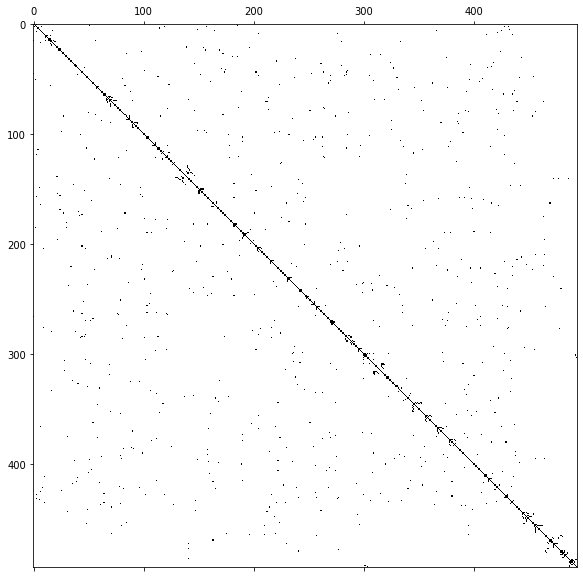

In [ ]:
mat = io.loadmat('bus494')
#print(mat)
A=mat['Problem']['A']
B=A[0]
C=B[0]
D=sp.csr_matrix.toarray(C)
print(type(D))
plt.figure(figsize=(10, 10))
plt.spy(D)
plt.show()

Observemos el efecto de la factorización LU en el patrón de dispersión.

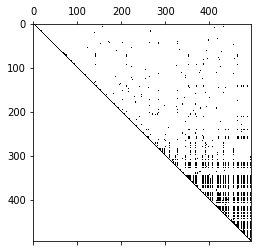

In [ ]:
p,l,u=la.lu(D)
plt.spy(u)

In [ ]:
print(np.linalg.cond(D))

2415411.0174664636


# Problemas (Selecciones 2 de los 4)


## Problema 1
Considere la matriz de segundas diferencias $A$ definida por 
$$a_{ij}=\left\{\begin{array}{cl}
-2, & i=j,\\
1, & |j-i|=1,\\
0, & |j-i|>1.
\end{array} \right.$$

1.   Que propiedades puede listar de las matrices de segundas diferencias
2.   Investigue como medir el tiempo de ejecución de un comando en python o MatLab y 
calcule el tiempo de resolver un sistema  $Ax=b$ con solve usando $A$, una matriz de 
 segundas diferencias de segundo orden de dimension $n=16,32,64,128,\dots$. Tome  $b=(1,1,\dots,1)^T.$. Grafique los tiempo de ejecución contra la dimension de la matriz.
3. Repita con la matriz de Hilbert.
4. Comente los resultados.




## Problema 2
Considere la matriz de Hilbert $H(n)$ con $n=4,5,6,\dots$.


1.   Para $n=5,6,7,\dots, 20$ calcule $\lambda(n)$ el menor valor propio de $H(n)$. Grafique este vector como función de $n$. 
2.  Calcule la factorización de Cholesky de $H(20)$.  
Teoricamente $H(20)$  un matriz positiva definida. Explique.
3. **Opcional** Proponga como calcular una paroximación de  $R(n)$ de la factorización de Cholesky de $H(n)=R(n)^TR(n)$ con $n=15,16,...20,\dots$. Presente un gráfico de $t(n)=tr(R(n))$ como evidencia del cálculo.




## Problema 3
Considere la matriz en https://suitesparse-collection-website.herokuapp.com/Sybrandt/AGATHA_2015. Gráfique el patrón de dispersión de esta matriz. Liste (con justificación numérica) las propiedades de esta matriz. 

*Problema*
Considere la matriz en https://suitesparse-collection-website.herokuapp.com/Sybrandt/AGATHA_2015. Use un método iterativo (diferente de Jacobi) para resolver el sistema $Ax=b$
con $b=(1,1,\dots,1)$.  Puede usar otra matriz de esta collección.

## Problema 4
Considere la matriz https://suitesparse-collection-website.herokuapp.com/Sybrandt/AGATHA_2015.  Que puede decir del problema asociado a esta matriz? 

# Solución problema 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: LinAlgWarning: Ill-conditioned matrix (rcond=1.1839e-19): result may not be accurate.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: LinAlgWarning: Ill-conditioned matrix (rcond=6.89957e-20): result may not be accurate.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: LinAlgWarning: Ill-conditioned matrix (rcond=1.64714e-20): result may not be accurate.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: LinAlgWarning: Ill-conditioned matrix (rcond=5.95281e-21): result may not be accurate.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: LinAlgWarning: Ill-conditioned matrix (rcond=3.77191e-21): result may not be accurate.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: LinAlgWarning: Ill-conditioned matrix (rcond=1.2512e-21): result may not be accurate.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: LinAlgWarning: Ill-condit

n	 t1	 error t1	 t2 	 error t2
[[ 16.0000  0.0665  0.0111  0.0786  0.0551]
 [ 32.0000  0.0797  0.0172  0.0969  0.0508]
 [ 64.0000  0.1355  0.3527  0.1536  0.2111]
 [ 128.0000  0.2308  0.3886  0.3919  1.0820]
 [ 256.0000  0.7704  1.7540  0.8411  1.4769]
 [ 512.0000  3.9332  8.4491  5.7925  12.0182]
 [ 1024.0000  14.9020  30.7991  12.3869  19.6601]
 [ 2048.0000  57.4029  116.2976  50.9831  104.7071]]


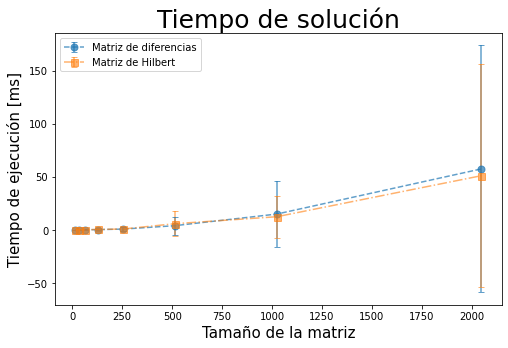

In [ ]:
import time
import statistics as s

def fill_A(A):
  for i in range(len(A)):
    for j in range(len(A[i])):
      if i==j:
        A[i][j]=-2
      elif abs(i-j)==1:
        A[i][j]=1


t = []
t2 = []
t1 = []
samples = 200

for i in range(4,12):
  n = 2**i
  A = np.zeros([n,n])
  b = np.ones([n,1])
  H=la.hilbert(n)
  fill_A(A)

  for _ in range(samples):
    start = time.time()
    x=la.solve(A,b)
    end = time.time()
    t1.append((end - start)*1000)

  for _ in range(samples):
    start = time.time()
    x=la.solve(H,b)
    end = time.time()
    t2.append((end - start)*1000)

  t.append([n,s.mean(t1),s.stdev(t1),s.mean(t2),s.stdev(t2)])

results = np.asarray(t)
print('n\t t1\t error t1\t t2 \t error t2')
print(results)

fig = plt.figure(1,figsize=(8,5))
plt.errorbar(results[:,0],results[:,1],yerr=results[:,2],capsize=3, marker='o', markersize=7, linestyle='--', alpha=0.7, label='Matriz de diferencias')
plt.errorbar(results[:,0],results[:,3],yerr=results[:,4],capsize=3, marker='s', markersize=7, linestyle='-.', alpha=0.6, label='Matriz de Hilbert')
plt.legend()
plt.title('Tiempo de solución',fontsize=25)
plt.xlabel('Tamaño de la matriz',fontsize=15)
plt.ylabel('Tiempo de ejecución [ms]',fontsize=15)
plt.show()


Los warnings son de la matriz de Hilbert. Lo que quiere decir que el resulado no es bueno. Además, el tiempo de ejecución de la matriz de diferencias tiende a ser menor al de la matriz de Hilbert al igual que la incertidumbre de la medida aunque no siempre. Los tiempos son muy cercanos. Cada sistema se resolvió 200 veces y el valor reportado es el promedio, la incertidumbre es la desviación estandar de todos los tiempos de ejecución.

In [ ]:
  n = 8
  A = np.zeros([n,n])
  fill_A(A)
  print(A)

[[-2.0000  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000]
 [ 1.0000 -2.0000  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000]
 [ 0.0000  1.0000 -2.0000  1.0000  0.0000  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  1.0000 -2.0000  1.0000  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000  1.0000 -2.0000  1.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000  0.0000  1.0000 -2.0000  1.0000  0.0000]
 [ 0.0000  0.0000  0.0000  0.0000  0.0000  1.0000 -2.0000  1.0000]
 [ 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  1.0000 -2.0000]]


La matríz de diferencias es tridiagonal. Además, es simétrica. Estas matrices tienen la característica especial de que el sistema $Ab=x$ se puede resolver en tiempo $O(n)$ usando el algoritmo de eliminación gausiana específicamente modificado para este tipo de matrices. Sin embargo, por los resultados de la gráfica es evidente que Scipy no utilizó el algoritmo mencionado. Si la matriz es Toeplitz, es decir, los elementos de cada diagonal tienen el mismo valor, entonces los autovalores se pueden encontrar en tiempo $O(n\,log(n))$ usando la fórmula
$$
a+2\sqrt{bc}\cos{\left(\frac{k\pi}{n+1}\right)}.
$$
Donde a es el valor de un elemento de la diagonal del medio, b de la de arriba y c de la de abajo. Es evidente que esto se cumple para la matriz de diferencias.

Scipy tiene una función para resolver sistemas toelpitz, también podemos comparar esto con la solución anterior para ver la mejora en el tiempo

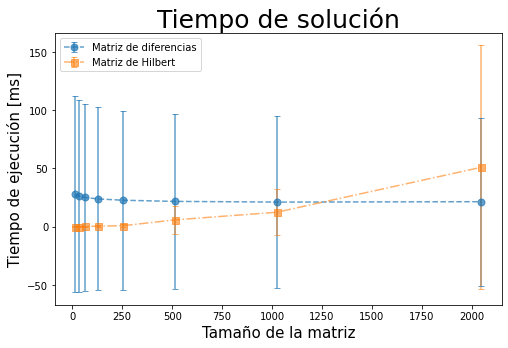

In [ ]:
T = []
for i in range(4,12):
  n = 2**i
  A = np.zeros([n,n])
  b = np.ones([n,1])
  fill_A(A)

  for _ in range(samples):
    start = time.time()
    x=la.solve_toeplitz((A[0], A[:,0]),b)
    end = time.time()
    t1.append((end - start)*1000)
  T.append([n,s.mean(t1),s.stdev(t1)])

results2 = np.asarray(T)

fig = plt.figure(1,figsize=(8,5))
plt.errorbar(results2[:,0],results2[:,1],yerr=results2[:,2],capsize=3, marker='o', markersize=7, linestyle='--', alpha=0.7, label='Matriz de diferencias')
plt.errorbar(results[:,0],results[:,3],yerr=results[:,4],capsize=3, marker='s', markersize=7, linestyle='-.', alpha=0.6, label='Matriz de Hilbert')
plt.legend()
plt.title('Tiempo de solución',fontsize=25)
plt.xlabel('Tamaño de la matriz',fontsize=15)
plt.ylabel('Tiempo de ejecución [ms]',fontsize=15)
plt.show()

# Solución problema 2

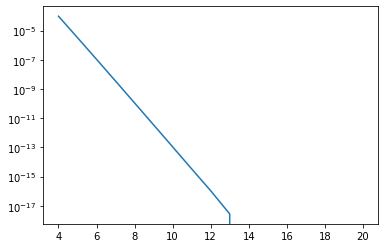

In [ ]:
ans = []
for n in range(4,21):
  H = la.hilbert(n)
  E = np.sort(la.eig(H)[0])
  r=np.real(E[0])
  ans.append([n,r])

res = np.asarray(ans)
plt.semilogy(res[:,0],res[:,1])
plt.show()

Si fueramos a calcular la factorización de cholesky de la siguiente forma:
```
H = la.hilbert(20)
r=la.cholesky(H)
print(r)
```
Nos encontrariamos con un problema. El error es 

```
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_cholesky.py in _cholesky(a, lower, overwrite_a, clean, check_finite)
     38     if info > 0:
     39         raise LinAlgError("%d-th leading minor of the array is not positive "
---> 40                           "definite" % info)
     41     if info < 0:
     42         raise ValueError('LAPACK reported an illegal value in {}-th argument'

LinAlgError: 14-th leading minor of the array is not positive definite
```
Sabemos que las matrices de Hilbert son positivamente definidas. Entonces, ¿por qué falla? Veamos los autovalores de la matriz a ver que podemos descubrir.

In [ ]:
H = la.hilbert(20)
E = np.sort(la.eig(H)[0])
print(E)

[-7.75462887e-18+0.j -5.70442584e-18+0.j -2.76752623e-18+0.j
  2.13878186e-18+0.j  8.53453453e-18+0.j  1.35184491e-17+0.j
  3.72252638e-16+0.j  1.73805036e-14+0.j  6.74081889e-13+0.j
  2.19289005e-11+0.j  6.03609533e-10+0.j  1.41395476e-08+0.j
  2.82765206e-07+0.j  4.83051005e-06+0.j  7.03343147e-05+0.j
  8.67671109e-04+0.j  8.96112861e-03+0.j  7.55958213e-02+0.j
  4.87038407e-01+0.j  1.90713472e+00+0.j]


Encontramos que tiene dos autovalores negativos por debajo de la presición de máquina. Lo que sugiere que es un problema de precisión numérica. La matriz de Hilbert está definida como
$$
H=\frac{1}{i+j-1}, \qquad 0< i,j<n
$$
La factorización de Cholesky de la matriz de Hilbert está dada por
$$
L_{jj}=\sqrt{H_{j,j}-∑_{k=1}^{j-1}L^2_{j,k}}
$$
$$
L_{ij}=\frac{1}{L_{jj}}\left(H_{ij}-\sum_{k=1}^{j-1}L_{ik}L_{jk}\right),\qquad i>j
$$
Como los últimos valores de la matriz de hilbert son tan pequeños, la resta tiene problemas de precisión, dando un valor negativo que no se puede calcular con la raíz. Esto suele pasar cuando la matriz está muy mal condicionada. Del ejercicio 1, sabemos que este es el caso para la matriz de Hilbert. Entonces, para estos casos, es necesario buscar un algoritmo que no tenga estas sensibilidades. 

Las matrices de Hilbert son simétricas, entonces, no todo está perdido. Usando esta propiedad se puede buscar una factorización que no requiera calcular la raíz. 

Proponemos la factorización LDL donde
$$
H=LDL^T
$$
$$
D_j=H_{jj}-\sum_{k=1}^{j-1}L_{jk}^2D_{k}
$$

$$
L_{ij}=\frac{1}{D_j}\left(H_{ij}-\sum_{k=1}^{j-1}L_{ik}L_{jk}D_{k}\right),\qquad i>j
$$

Esta factorización funciona siempre que los $D_j$ no sean cero y la matriz tenga entradas reales, aunque existe una generalización para matrices con entradas imaginarias. D es una matriz diagonal, no un vector. Pero, lo más importante es que ya no debería haber problemas porque no se está calculando una raíz cuadrada. Además, las raices cuadradas computacionalmente hablando suelen ser más lentas que las otras opraciones, entonces, debería ser más rápido y estable, auqnue el resultado es menos preciso que el de la factorización de Cholesky. 

Scipy tiene esta factorización ya implementada, entonces

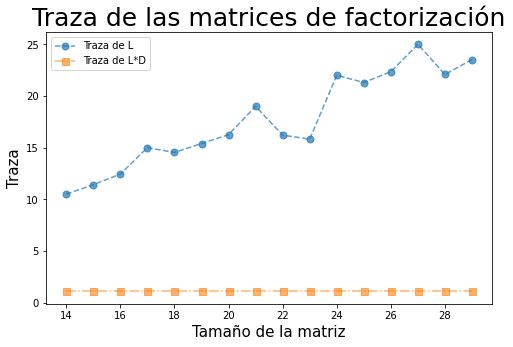

In [ ]:
tr = []
for n in range(14,30):
  H = la.hilbert(n)
  L,D,LT=la.ldl(H)
  tr.append([n,np.trace(L),np.trace(L*D)])

mtr = np.asarray(tr)
fig = plt.figure(1,figsize=(8,5))
plt.plot(mtr[:,0],mtr[:,1], marker='o', markersize=7, linestyle='--', alpha=0.7, label='Traza de L')
plt.plot(mtr[:,0],mtr[:,2], marker='s', markersize=7, linestyle='-.', alpha=0.6, label='Traza de L*D')
plt.legend()
plt.title('Traza de las matrices de factorización',fontsize=25)
plt.xlabel('Tamaño de la matriz',fontsize=15)
plt.ylabel('Traza',fontsize=15)
plt.show()

Se supone que la diagonal de la matriz L en la factorización LDL debe estar llena de unos. Por tanto hay errores numéricos en la factorización. Aún así, el comportamiento es más o menos el esperado. 